In [61]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

In [62]:

Arrestee = pd.read_csv('Merged_Arrestee_Data_2018-2024.csv', dtype={'Age': str})


In [63]:
print(Arrestee.head())


     Agency         Date        / Number  Code                      Offense  \
0  Abington  03-Jan-2018  \nABI201800003   NaN  Driving Under the Influence   
1  Abington  05-Jan-2018  \nABI201800009   NaN  Driving Under the Influence   
2  Abington  03-Feb-2018  \nABI201800059   NaN           All Other Offenses   
3  Abington  15-Feb-2018  \nABI201800087   NaN           All Other Offenses   
4  Abington  20-Feb-2018  \nABI201800106   NaN                  Drunkenness   

                 Type Age     Sex                       Race  \
0  Taken into Custody  29  Female                      White   
1             On-View  47    Male                      White   
2  Taken into Custody  41    Male                      White   
3             On-View  28  Female                      White   
4             On-View  30    Male  Black or African American   

                Ethnicity Disposition  Year  
0  Not Hispanic or Latino         NaN  2018  
1  Not Hispanic or Latino         NaN  2018  
2 

In [64]:
Arrestee

,Agency,Date,/ Number,Code,Offense,Type,Age,Sex,Race,Ethnicity,Disposition,Year
0,Abington,03-Jan-2018,\nABI201800003,NaN,Driving Under the Influence,Taken into Custody,29,Female,White,Not Hispanic or Latino,NaN,2018
1,Abington,05-Jan-2018,\nABI201800009,NaN,Driving Under the Influence,On-View,47,Male,White,Not Hispanic or Latino,NaN,2018
2,Abington,03-Feb-2018,\nABI201800059,NaN,All Other Offenses,Taken into Custody,41,Male,White,Not Hispanic or Latino,NaN,2018
3,Abington,15-Feb-2018,\nABI201800087,NaN,All Other Offenses,On-View,28,Female,White,Not Hispanic or Latino,NaN,2018
4,Abington,20-Feb-2018,\nABI201800106,NaN,Drunkenness,On-View,30,Male,Black or African American,Hispanic or Latino,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
463904,Yarmouth,02-Mar-2024,\nYAR202400133,NaN,All Other Offenses,On-View,54,Female,White,Not Hispanic or Latino,NaN,2024
463905,Yarmouth,04-Mar-2024,\nYAR202400141,NaN,All Other Offenses,On-View,67,Male,White,Not Hispanic or Latino,NaN,2024
463906,Yarmouth,09-Mar-2024,\nYAR202400156,NaN,Driving Under the Influence,On-View,44,Male,White,Not Hispanic or Latino,NaN,2024
463907,Yarmouth,15-Mar-2024,\nYAR202400172,NaN,All Other Offenses,Taken into Custody,40,Male,White,Not Hispanic or Latino,NaN,2024


In [65]:
Arrestee.dtypes

Agency          object
Date            object
/ Number        object
Code           float64
Offense         object
Type            object
Age             object
Sex             object
Race            object
Ethnicity       object
Disposition     object
Year             int64
dtype: object

In [66]:
Arrestee.describe

<bound method NDFrame.describe of           Agency         Date        / Number  Code  \
0       Abington  03-Jan-2018  \nABI201800003   NaN   
1       Abington  05-Jan-2018  \nABI201800009   NaN   
2       Abington  03-Feb-2018  \nABI201800059   NaN   
3       Abington  15-Feb-2018  \nABI201800087   NaN   
4       Abington  20-Feb-2018  \nABI201800106   NaN   
...          ...          ...             ...   ...   
463904  Yarmouth  02-Mar-2024  \nYAR202400133   NaN   
463905  Yarmouth  04-Mar-2024  \nYAR202400141   NaN   
463906  Yarmouth  09-Mar-2024  \nYAR202400156   NaN   
463907  Yarmouth  15-Mar-2024  \nYAR202400172   NaN   
463908  Yarmouth  21-Mar-2024  \nYAR202400185   NaN   

                            Offense                Type Age     Sex  \
0       Driving Under the Influence  Taken into Custody  29  Female   
1       Driving Under the Influence             On-View  47    Male   
2                All Other Offenses  Taken into Custody  41    Male   
3                All 

In [67]:
import pandas as pd

# Start with a copy to avoid changing original
df_clean = Arrestee.copy()

# 1. Clean and convert Age
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean = df_clean[df_clean['Age'].notnull()]  # remove rows with invalid age

# 2. Drop rows with missing Sex, Race, or Ethnicity
df_clean = df_clean.dropna(subset=['Sex', 'Race', 'Ethnicity'])

# 3. Standardize text fields
text_columns = ['Sex', 'Race', 'Ethnicity']
for col in text_columns:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.title()

# 4. Optional: Replace known "Unknown" or invalid values
replacements = {
    'Unknown': pd.NA,
    'Not Specified': pd.NA,
    'Na': pd.NA,
    'N/A': pd.NA,
    '': pd.NA
}

for col in text_columns:
    df_clean[col] = df_clean[col].replace(replacements)
    df_clean = df_clean[df_clean[col].notnull()]  # drop rows with invalid values

# 5. Reset index after cleaning
df_clean = df_clean.reset_index(drop=True)

# Preview result
print(df_clean.info())
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412911 entries, 0 to 412910
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Agency       412911 non-null  object 
 1   Date         412911 non-null  object 
 2   / Number     412911 non-null  object 
 3   Code         97227 non-null   float64
 4   Offense      412911 non-null  object 
 5   Type         412911 non-null  object 
 6   Age          412911 non-null  float64
 7   Sex          412911 non-null  object 
 8   Race         412911 non-null  object 
 9   Ethnicity    412911 non-null  object 
 10  Disposition  11117 non-null   object 
 11  Year         412911 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 37.8+ MB
None


,Agency,Date,/ Number,Code,Offense,Type,Age,Sex,Race,Ethnicity,Disposition,Year
0,Abington,03-Jan-2018,\nABI201800003,NaN,Driving Under the Influence,Taken into Custody,29.0,Female,White,Not Hispanic Or Latino,NaN,2018
1,Abington,05-Jan-2018,\nABI201800009,NaN,Driving Under the Influence,On-View,47.0,Male,White,Not Hispanic Or Latino,NaN,2018
2,Abington,03-Feb-2018,\nABI201800059,NaN,All Other Offenses,Taken into Custody,41.0,Male,White,Not Hispanic Or Latino,NaN,2018
3,Abington,15-Feb-2018,\nABI201800087,NaN,All Other Offenses,On-View,28.0,Female,White,Not Hispanic Or Latino,NaN,2018
4,Abington,20-Feb-2018,\nABI201800106,NaN,Drunkenness,On-View,30.0,Male,Black Or African American,Hispanic Or Latino,NaN,2018


In [68]:
Arrestee

,Agency,Date,/ Number,Code,Offense,Type,Age,Sex,Race,Ethnicity,Disposition,Year
0,Abington,03-Jan-2018,\nABI201800003,NaN,Driving Under the Influence,Taken into Custody,29,Female,White,Not Hispanic or Latino,NaN,2018
1,Abington,05-Jan-2018,\nABI201800009,NaN,Driving Under the Influence,On-View,47,Male,White,Not Hispanic or Latino,NaN,2018
2,Abington,03-Feb-2018,\nABI201800059,NaN,All Other Offenses,Taken into Custody,41,Male,White,Not Hispanic or Latino,NaN,2018
3,Abington,15-Feb-2018,\nABI201800087,NaN,All Other Offenses,On-View,28,Female,White,Not Hispanic or Latino,NaN,2018
4,Abington,20-Feb-2018,\nABI201800106,NaN,Drunkenness,On-View,30,Male,Black or African American,Hispanic or Latino,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
463904,Yarmouth,02-Mar-2024,\nYAR202400133,NaN,All Other Offenses,On-View,54,Female,White,Not Hispanic or Latino,NaN,2024
463905,Yarmouth,04-Mar-2024,\nYAR202400141,NaN,All Other Offenses,On-View,67,Male,White,Not Hispanic or Latino,NaN,2024
463906,Yarmouth,09-Mar-2024,\nYAR202400156,NaN,Driving Under the Influence,On-View,44,Male,White,Not Hispanic or Latino,NaN,2024
463907,Yarmouth,15-Mar-2024,\nYAR202400172,NaN,All Other Offenses,Taken into Custody,40,Male,White,Not Hispanic or Latino,NaN,2024


In [69]:
print(df['Age'].unique()[:50])   # show first 50 unique values in Age
print(df['Age'].dtype)          # check data type
print(df['Age'].isna().sum())   # count NaN after conversion


[29. 47. 41. 28. 30. 24. 22. 48. 19. 55. 45. 51. 35. 20. 17. 38. 36. 44.
 15. 25. 70. 27. 18. 63. 46. 32. 23. 26. 50. 42. 31. 54. 34. 40. 21. 71.
 37. 39. 57. 58. 43. 49. 68. 53. 62. 64. 33. 52. 59. 56.]
float64
0


In [70]:
import re

# Convert Age column to string and extract digits
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)')  

# Convert back to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows where Age is still NaN
df = df[df['Age'].notna()]


In [87]:






# Load merged dataset
Arrestee = pd.read_csv("Merged_Arrestee_Data_2018-2024.csv")

# Fix Age column: extract digits only
Arrestee['Age'] = Arrestee['Age'].astype(str).str.extract(r'(\d+)')

# Convert back to numeric
Arrestee['Age'] = pd.to_numeric(Arrestee['Age'], errors='coerce')

# Drop rows where Age is still NaN
Arrestee = Arrestee[Arrestee['Age'].notna()]

# Check cleaned Age column
print("Unique Ages Sample:", Arrestee['Age'].unique()[:20])
print("Age dtype:", Arrestee['Age'].dtype)
print("Missing Ages:", Arrestee['Age'].isna().sum())






C:\Users\Abrha\AppData\Local\Temp\ipykernel_8764\3498018008.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Arrestee = pd.read_csv("Merged_Arrestee_Data_2018-2024.csv")


Unique Ages Sample: [29. 47. 41. 28. 30. 24. 22. 48. 19. 21. 55. 45. 51. 35. 20. 34. 17. 38.
 36. 31.]
Age dtype: float64
Missing Ages: 0


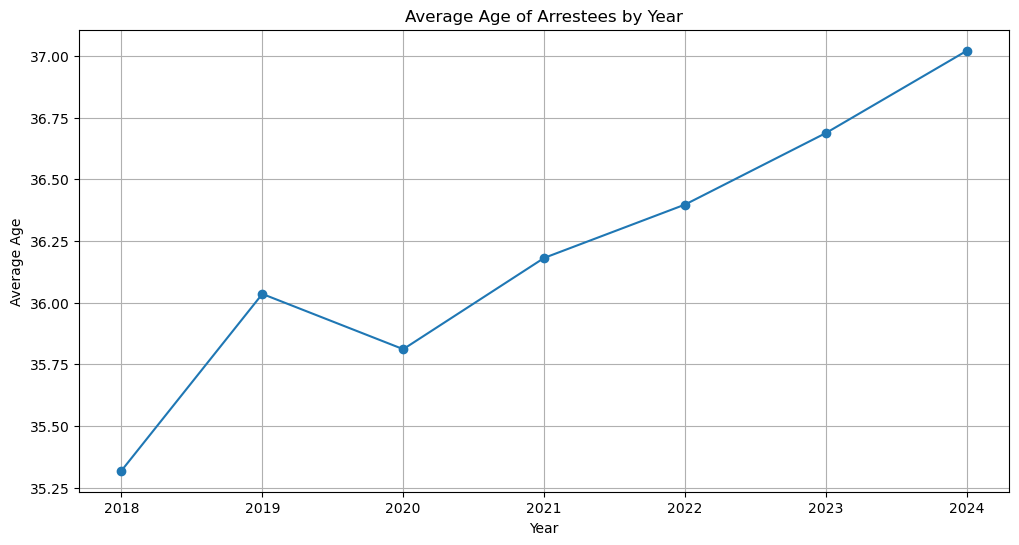

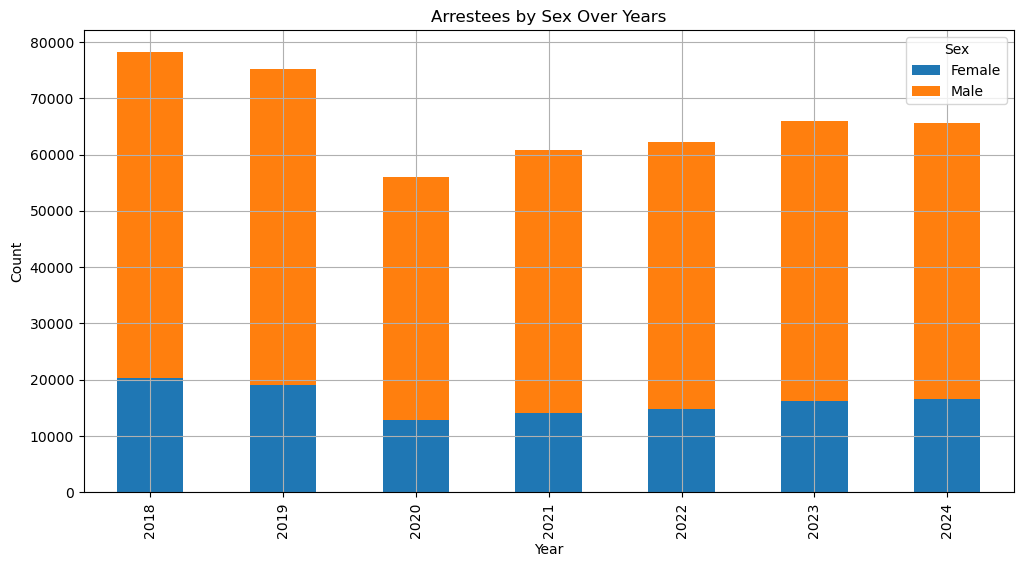

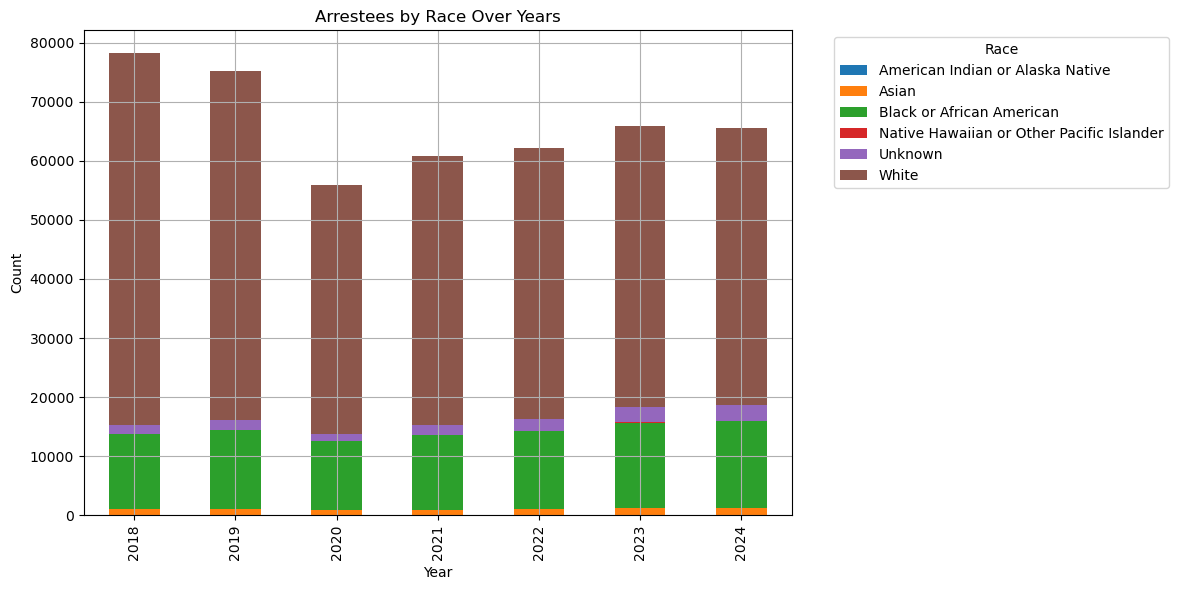

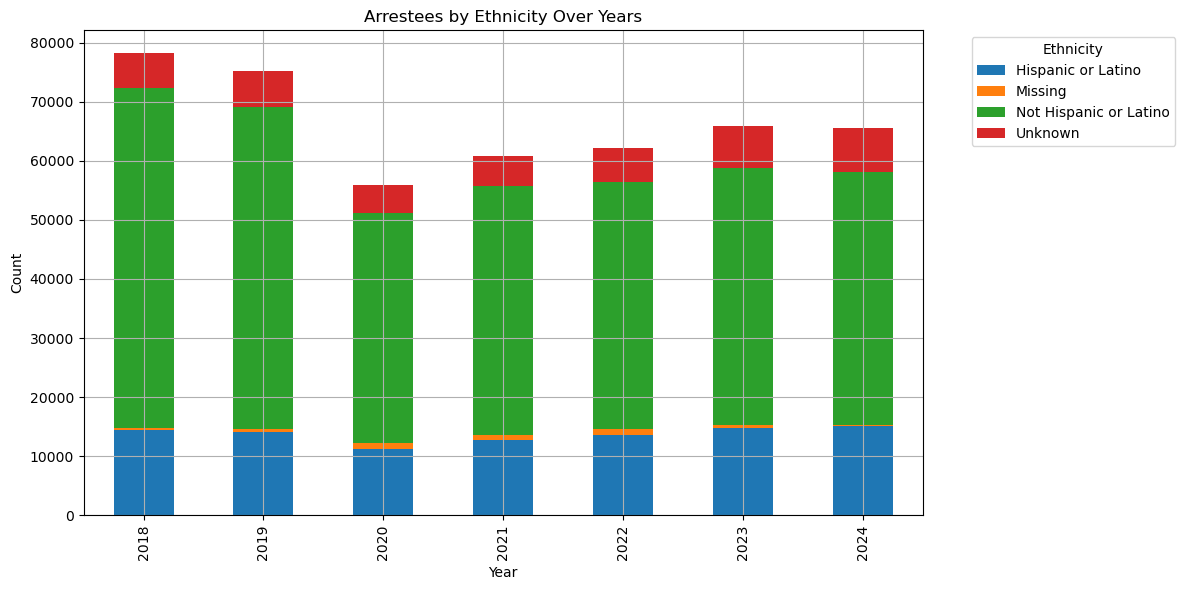

In [86]:


# If your merged dataframe is named something else, replace this with your actual variable
df = Arrestee.copy()

# Convert Age to numeric, errors set to NaN so non-numeric entries are dropped
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Set figure size
plt.figure(figsize=(12, 6))

# 1. Age vs Year (Average Age per Year)
avg_age = df.groupby('Year')['Age'].mean()
plt.plot(avg_age.index, avg_age.values, marker='o')
plt.title('Average Age of Arrestees by Year')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

# 2. Sex vs Year (Count by Sex)
sex_counts = df.groupby(['Year', 'Sex']).size().unstack()
sex_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrestees by Sex Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

# 3. Race vs Year (Count by Race)
race_counts = df.groupby(['Year', 'Race']).size().unstack()
race_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrestees by Race Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Ethnicity vs Year (Count by Ethnicity)
ethnicity_counts = df.groupby(['Year', 'Ethnicity']).size().unstack()
ethnicity_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrestees by Ethnicity Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


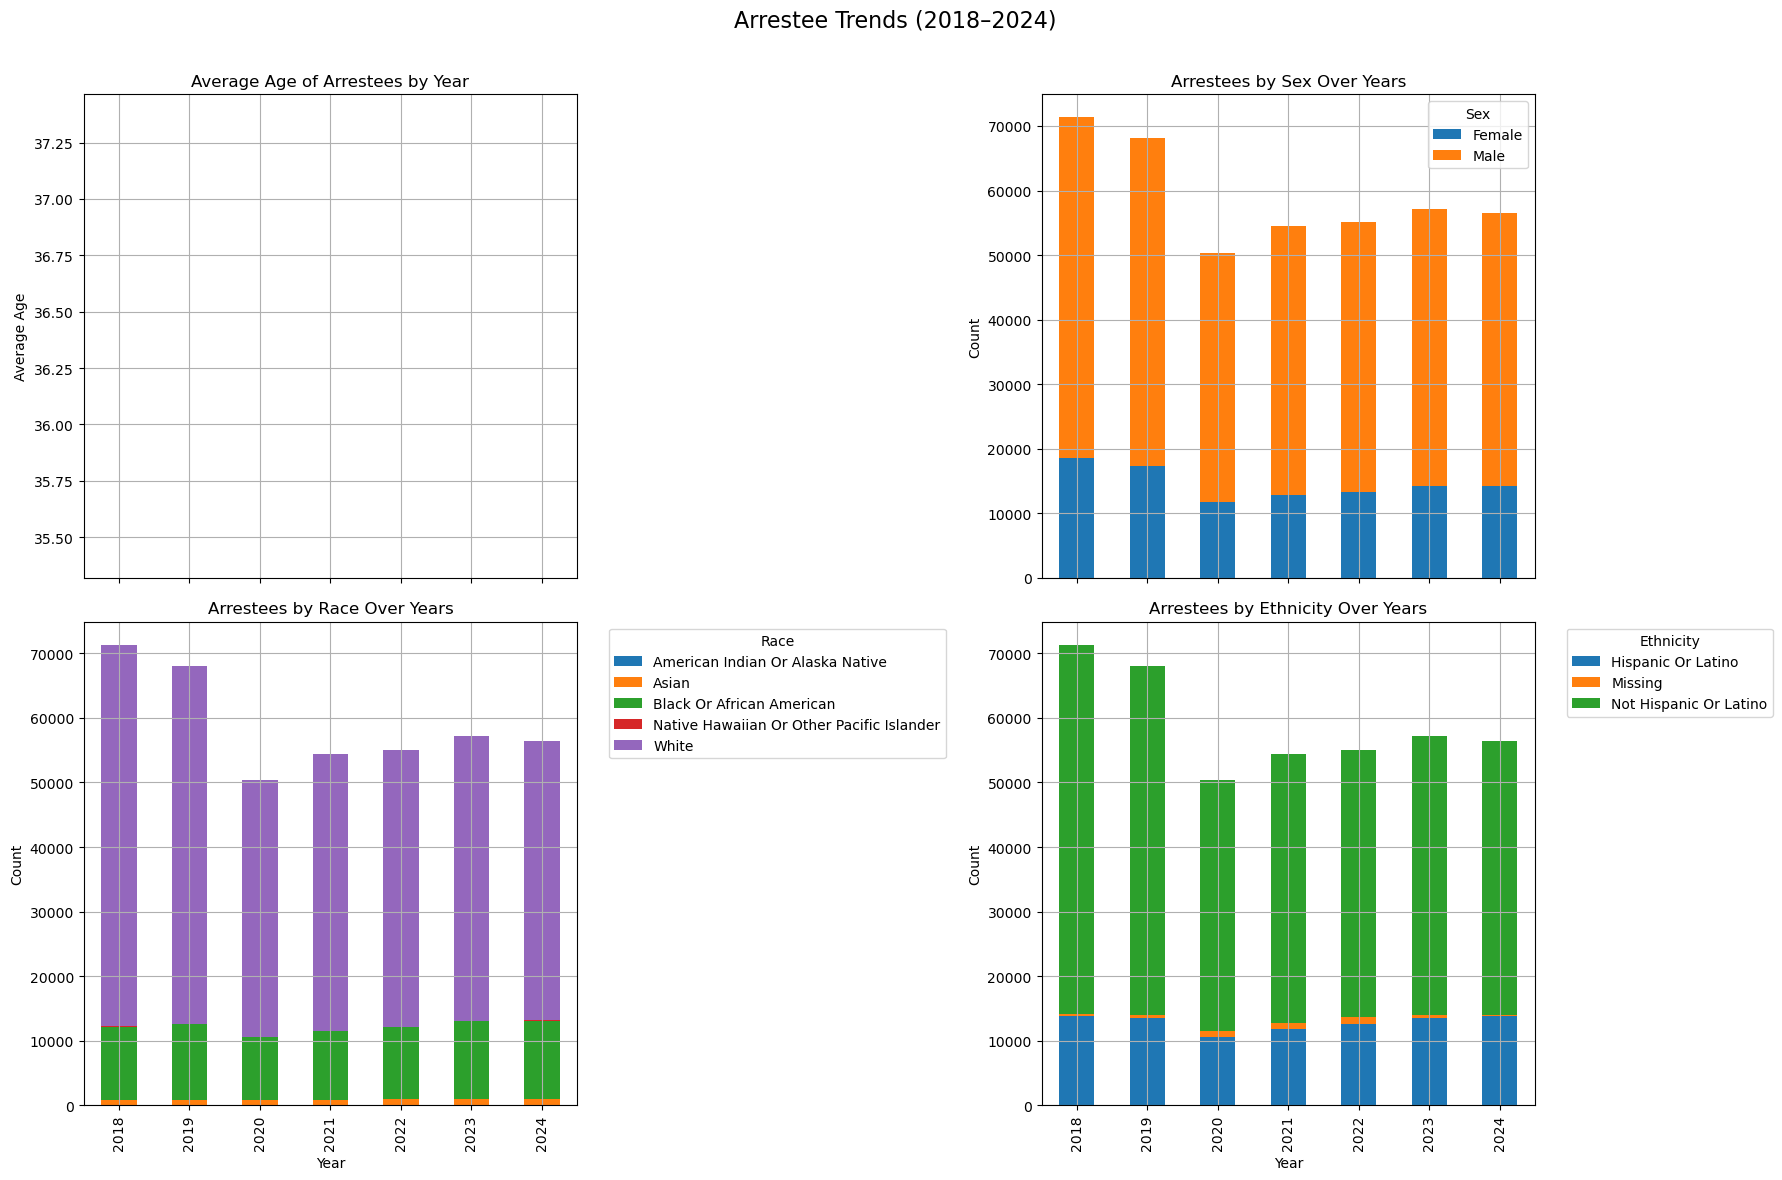

In [85]:


# Make a copy of cleaned dataset (replace df_clean with merged_df if not cleaned yet)
df = df_clean.copy()

# Ensure Age is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Set up figure with 4 subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

# --------------------
# 1. Average Age vs Year
avg_age = df.groupby('Year')['Age'].mean()
axes[0, 0].plot(avg_age.index, avg_age.values, marker='o')
axes[0, 0].set_title('Average Age of Arrestees by Year')
axes[0, 0].set_ylabel('Average Age')
axes[0, 0].grid(True)

# --------------------
# 2. Sex vs Year
sex_counts = df.groupby(['Year', 'Sex']).size().unstack()
sex_counts.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Arrestees by Sex Over Years')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Sex')
axes[0, 1].grid(True)

# --------------------
# 3. Race vs Year
race_counts = df.groupby(['Year', 'Race']).size().unstack()
race_counts.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Arrestees by Race Over Years')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True)

# --------------------
# 4. Ethnicity vs Year
ethnicity_counts = df.groupby(['Year', 'Ethnicity']).size().unstack()
ethnicity_counts.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Arrestees by Ethnicity Over Years')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True)

# --------------------
# Common X Label
for ax in axes[1, :]:
    ax.set_xlabel("Year")

plt.suptitle("Arrestee Trends (2018–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


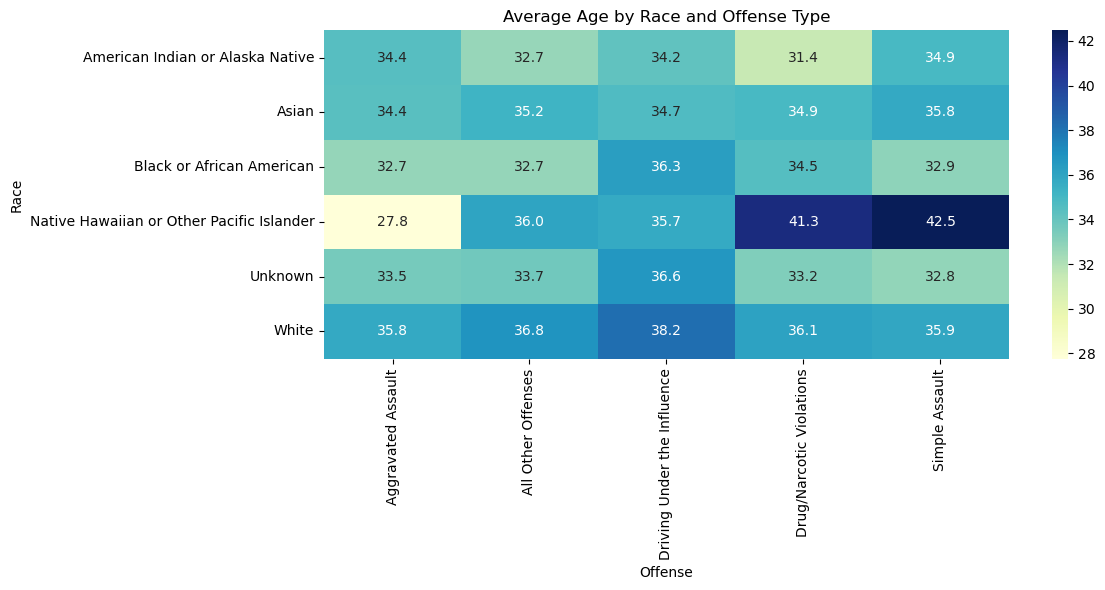

In [78]:


# Ensure Age is numeric
Arrestee['Age'] = pd.to_numeric(Arrestee['Age'], errors='coerce')

# Drop rows with missing key fields
filtered_df = c.dropna(subset=['Offense', 'Age', 'Race', 'Ethnicity'])

# Optional: simplify offense categories if needed
# filtered_df['Offense'] = filtered_df['Offense'].str.strip().str.title()

# Group by Offense, Race, Ethnicity and calculate average age
grouped = (
    filtered_df
    .groupby(['Offense', 'Race', 'Ethnicity'])
    .agg(Average_Age=('Age', 'mean'), Count=('Age', 'size'))
    .reset_index()
)

# Sort by count for better visibility
grouped = grouped.sort_values(by='Count', ascending=False)

# Plot: Heatmap of Average Age by Race & Ethnicity for Top Offenses
top_offenses = grouped['Offense'].value_counts().head(5).index
subset = grouped[grouped['Offense'].isin(top_offenses)]

plt.figure(figsize=(12, 6))
pivot_table = subset.pivot_table(index='Race', columns='Offense', values='Average_Age')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Age by Race and Offense Type")
plt.ylabel("Race")
plt.xlabel("Offense")
plt.tight_layout()
plt.show()


In [82]:
import pandas as pd

# Load your dataset (change path if needed)
df = pd.read_csv("Merged_Arrestee_Data_2018-2024.csv")

# Ensure Age is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing key fields
filtered_df = df.dropna(subset=['Offense', 'Age', 'Race', 'Ethnicity'])

# Standardize formatting
filtered_df['Offense'] = filtered_df['Offense'].str.strip().str.title()
filtered_df['Race'] = filtered_df['Race'].str.strip().str.title()
filtered_df['Ethnicity'] = filtered_df['Ethnicity'].str.strip().str.title()

# Get top 5 offenses by count
top_offenses = filtered_df['Offense'].value_counts().head(5).index

# Filter for Black or African American arrestees and top offenses
black_df = filtered_df[
    (filtered_df['Race'] == 'Black Or African American') &
    (filtered_df['Offense'].isin(top_offenses))
]

# Group by offense and calculate descriptive stats
black_age_stats = black_df.groupby('Offense')['Age'].describe()

# Display the results
print("Descriptive Age Statistics for Black or African American Arrestees (Top 5 Offenses):")
print(black_age_stats)



C:\Users\Abrha\AppData\Local\Temp\ipykernel_8764\1875622186.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Merged_Arrestee_Data_2018-2024.csv")
C:\Users\Abrha\AppData\Local\Temp\ipykernel_8764\1875622186.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Offense'] = filtered_df['Offense'].str.strip().str.title()
C:\Users\Abrha\AppData\Local\Temp\ipykernel_8764\1875622186.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Descriptive Age Statistics for Black or African American Arrestees (Top 5 Offenses):
                               count       mean        std   min   25%   50%  \
Offense                                                                        
Aggravated Assault            9565.0  34.192577  12.949268   0.0  24.0  32.0   
All Other Offenses           28937.0  33.680409  11.683452   6.0  25.0  31.0   
Driving Under The Influence   4556.0  36.382572  11.424838  17.0  28.0  34.0   
Drug/Narcotic Violations      7178.0  34.472694  11.516604   0.0  26.0  32.0   
Simple Assault               18036.0  33.423874  11.829827   0.0  25.0  31.0   

                              75%   max  
Offense                                  
Aggravated Assault           42.0  88.0  
All Other Offenses           40.0  82.0  
Driving Under The Influence  43.0  78.0  
Drug/Narcotic Violations     41.0  83.0  
Simple Assault               40.0  99.0  


C:\Users\Abrha\AppData\Local\Temp\ipykernel_8764\1875622186.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Ethnicity'] = filtered_df['Ethnicity'].str.strip().str.title()


In [83]:
black_age_stats

,count,mean,std,min,25%,50%,75%,max
Offense,,,,,,,,
Aggravated Assault,9565.0,34.192577,12.949268,0.0,24.0,32.0,42.0,88.0
All Other Offenses,28937.0,33.680409,11.683452,6.0,25.0,31.0,40.0,82.0
Driving Under The Influence,4556.0,36.382572,11.424838,17.0,28.0,34.0,43.0,78.0
Drug/Narcotic Violations,7178.0,34.472694,11.516604,0.0,26.0,32.0,41.0,83.0
Simple Assault,18036.0,33.423874,11.829827,0.0,25.0,31.0,40.0,99.0


In [88]:
Arrestee

,Agency,Date,/ Number,Code,Offense,Type,Age,Sex,Race,Ethnicity,Disposition,Year
0,Abington,03-Jan-2018,\nABI201800003,NaN,Driving Under the Influence,Taken into Custody,29.0,Female,White,Not Hispanic or Latino,NaN,2018
1,Abington,05-Jan-2018,\nABI201800009,NaN,Driving Under the Influence,On-View,47.0,Male,White,Not Hispanic or Latino,NaN,2018
2,Abington,03-Feb-2018,\nABI201800059,NaN,All Other Offenses,Taken into Custody,41.0,Male,White,Not Hispanic or Latino,NaN,2018
3,Abington,15-Feb-2018,\nABI201800087,NaN,All Other Offenses,On-View,28.0,Female,White,Not Hispanic or Latino,NaN,2018
4,Abington,20-Feb-2018,\nABI201800106,NaN,Drunkenness,On-View,30.0,Male,Black or African American,Hispanic or Latino,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
463904,Yarmouth,02-Mar-2024,\nYAR202400133,NaN,All Other Offenses,On-View,54.0,Female,White,Not Hispanic or Latino,NaN,2024
463905,Yarmouth,04-Mar-2024,\nYAR202400141,NaN,All Other Offenses,On-View,67.0,Male,White,Not Hispanic or Latino,NaN,2024
463906,Yarmouth,09-Mar-2024,\nYAR202400156,NaN,Driving Under the Influence,On-View,44.0,Male,White,Not Hispanic or Latino,NaN,2024
463907,Yarmouth,15-Mar-2024,\nYAR202400172,NaN,All Other Offenses,Taken into Custody,40.0,Male,White,Not Hispanic or Latino,NaN,2024
